Name: John T.H. Wong

Hardware: Macbook Air, M1, 2020

OS: MacOS 14.4

SDE: VS Code, 1.91.1 (Universal)

# Schelling Segregation Model

I create a 1D segregation model where agents have heterogeneous preference for homogeneity. Preference is drawn from a uniform distribution of values between 0 and 0.7.

First, generate import the module and generate a city. Run the generateTracts() function to create 1,000 tracts.

In [3]:
import SchellingModule as sl
from datetime import datetime
import matplotlib.pyplot as plt

levitt = sl.City()
levitt.generateTracts(1000)

Move the unhappy residents until everyone is happy.

In [4]:
startTime = datetime.now()

levitt.executeMoves()

endTime = datetime.now()
print(f"Model execution time (HH:MM:SS) is: {endTime - startTime}")

Average homogeneity is at 0.5463968957871397.
0.20599999999999996 of residents are unhappy.
Average homogeneity is at 0.5658167036215823.
0.15500000000000003 of residents are unhappy.
Average homogeneity is at 0.5862527716186259.
0.11199999999999999 of residents are unhappy.
Average homogeneity is at 0.6029379157427944.
0.07799999999999996 of residents are unhappy.
Average homogeneity is at 0.6195121951219522.
0.03500000000000003 of residents are unhappy.
Model execution time (HH:MM:SS) is: 0:00:05.231810


## Create time series plots

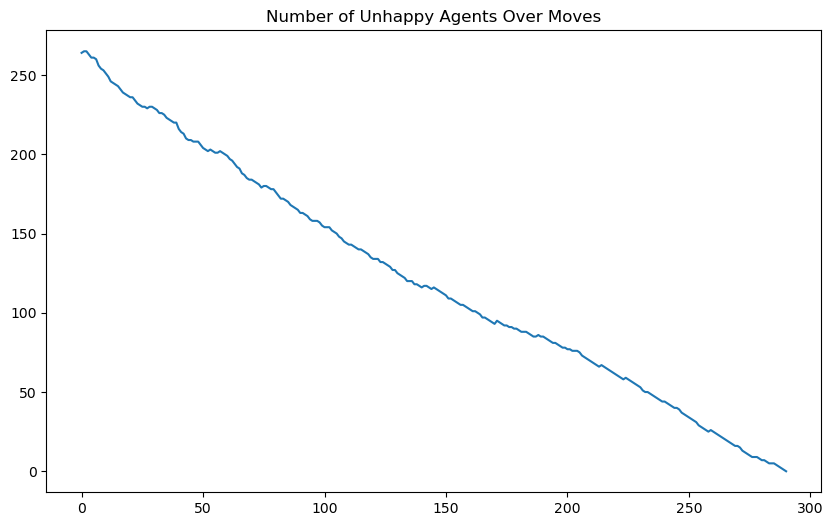

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(levitt.moveData['unhappyCount'], linestyle='-')
plt.title('Number of Unhappy Agents Over Moves')

plt.show()

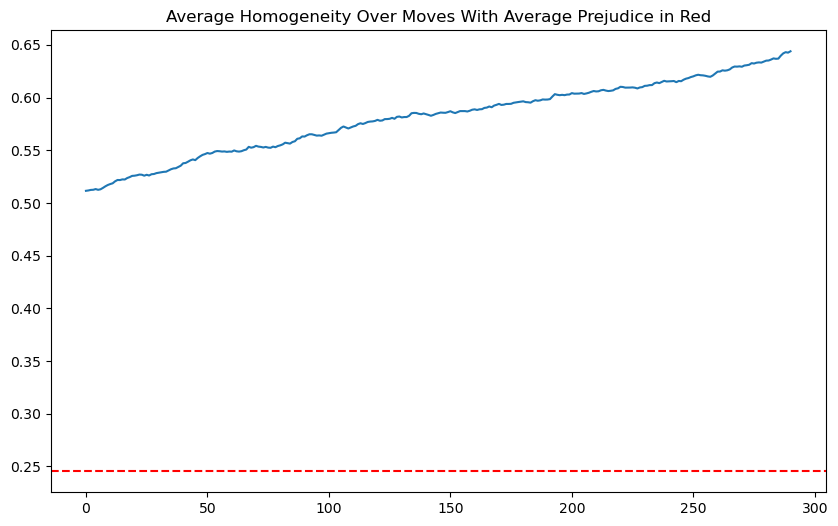

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(levitt.moveData['avgHomogeneity'], linestyle='-')
plt.axhline(y = levitt.surveyAvgPrejudice(), color='red', linestyle='dashed', label = 'Average prejudice')
plt.title('Average Homogeneity Over Moves With Average Prejudice in Red')

plt.show()

## Mover Characteristics

I want to know how much each agent moved.

In [7]:
import pandas as pd

# Step 1: Count the frequency of each unique ID
id_counts = pd.Series(levitt.moveData['movingAgentID']).value_counts()

# Step 2: Count the number of unique IDs for each frequency
frequency_counts = id_counts.value_counts().sort_index()

# Step 3: Create a DataFrame with the frequency and count
df = pd.DataFrame({
    'frequency': frequency_counts.index,
    'count': frequency_counts.values
})

print(df)

   frequency  count
0          1    279
1          2      6


So most agents moved once. A handful agents moved twice.